In [368]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import seaborn as sns

In [621]:
#topicList = ["210473494", "210307098", "209967593", "207670339", "205580605"] 人才组
#topicList = ["207768078", "207132337", "204671016", "202811686"] #彩虹组
#topicList = ["203676948", "204807786"] # 草原
#topicList = ["210425155", "210131057", "210045682", "209681866", "209683935", "210036469", "208660469"]
topicList = ["201742469"]

In [500]:
def readWebData(page, topicNum):
    header={
    "Cookie": """bid=M8d5os6pdMc; __utmc=30149280; __utmz=30149280.1612629628.1.1.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not provided); push_doumail_num=0; __utmv=30149280.23180; ct=y; douban-profile-remind=1; push_noty_num=0; ap_v=0,6.0; ll="108120"; dbcl2="231803702:BHiciIvzZnI"; ck=q-BM; _pk_ref.100001.8cb4=["","",1612748144,"https://www.google.com/"]; _pk_ses.100001.8cb4=*; __utma=30149280.40126775.1612629628.1612742210.1612748145.9; __utmt=1; _pk_id.100001.8cb4=a851698bf89c60d1.1612629627.9.1612748162.1612745875.; __utmb=30149280.16.5.1612748162452""",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36 Edg/88.0.705.63"
    }
    url = "https://www.douban.com/group/topic/"+ topicNum + "/?start=" + str(page)
    r = requests.get(url=url,headers=header)
    data = r.content.decode('utf-8')
    return data

In [359]:
def createInfoList(webInfo, replyIdList, replyIdAltList, commentList, timeList, topicNum, topicNumList):
    for reply in webInfo:
        replyId = reply["data-author-id"]
        replyIdAlt = list(reply.find("h4"))[1].get_text()
        comment = reply.find("p", class_='reply-content').get_text()
        timestamp = reply.find("span", class_='pubtime').get_text()
        replyIdList.append(replyId)
        replyIdAltList.append(replyIdAlt)
        commentList.append(comment)
        timeList.append(timestamp)
        topicNumList.append(topicNum)
    return replyIdList, replyIdAltList, commentList, timeList, topicNumList

In [622]:
replyIdList = []
replyIdAltList = []
commentList = []
timeList = []
topicNumList = []

In [623]:
for topicNum in topicList:
    page = 0
    commentCount = 1
    while commentCount != 0:
        data = readWebData(page, topicNum)
        soup = BeautifulSoup(data, 'html.parser')
        webInfo = soup.find_all('li', class_='clearfix comment-item reply-item')
        replyIdList, replyIdListAltList, commentList, timeList, topicNumList = createInfoList(webInfo, replyIdList, replyIdAltList, commentList, timeList,topicNum, topicNumList)
        commentCount = len(soup.find_all('li', class_='clearfix comment-item reply-item'))
        page+=100

In [624]:
commentDf = pd.DataFrame(list(zip(topicNumList, replyIdList, replyIdListAltList, commentList, timeList)), 
               columns =['TopicNum','UserId', 'UserAltName', 'Comment', 'TimePublished'])

In [625]:
commentDf = commentDf.drop_duplicates()

In [364]:
commentDf_reduced = commentDf[['TopicNum','UserId', 'TimePublished']]

In [385]:
commentDf.loc[commentDf['UserId'] == "191349550"]

,TopicNum,UserId,UserAltName,Comment,TimePublished
13152,210045682,191349550,喵喵喵,精致小王子,2021-01-31 14:05:54
13153,210045682,191349550,喵喵喵,脸上有肉肉更可爱些,2021-01-31 14:07:50
13155,210045682,191349550,喵喵喵,那些人可能比较恋丑吧😪,2021-01-31 14:20:44
13156,210045682,191349550,喵喵喵,不可以哦⊙∀⊙！,2021-01-31 14:21:05
13157,210045682,191349550,喵喵喵,对呀，从小到大都很好看的弟弟,2021-01-31 14:21:32
13158,210045682,191349550,喵喵喵,我也好喜欢第一张😍,2021-01-31 14:21:47
13159,210045682,191349550,喵喵喵,嗯，脸上有肉肉更可爱了,2021-01-31 14:22:41
13160,210045682,191349550,喵喵喵,😘😘,2021-01-31 14:22:51
13161,210045682,191349550,喵喵喵,半熟的魅力😍,2021-01-31 14:23:23
13162,210045682,191349550,喵喵喵,前一阵子为了电影减重了20斤，体重只有96斤，很瘦很瘦了,2021-01-31 14:24:09


In [365]:
len(commentDf_reduced)

9340

In [367]:
commentDf_reduced.head(50)

,TopicNum,UserId,TimePublished
0,210425155,132183179,2021-02-04 10:02:19
1,210425155,220186614,2021-02-04 10:02:38
2,210425155,1892879,2021-02-04 10:02:17
3,210425155,212875796,2021-02-04 10:02:11
4,210425155,173277763,2021-02-04 10:02:12
5,210425155,177272224,2021-02-04 10:02:06
10,210425155,177697575,2021-02-04 10:02:20
12,210425155,176048164,2021-02-04 10:02:42
13,210425155,178300273,2021-02-04 10:02:45
14,210425155,175556828,2021-02-04 10:02:46


In [381]:
countDf = commentDf_reduced.groupby(['TopicNum', 'UserId']).count().reset_index()

In [387]:
countDf.sort_values(['TimePublished'], ascending=False).head(3).reset_index().rename(columns={"UserId": "用户名", "UserAltName_y": "用户昵称", "Comment": "评论数"})

,index,TopicNum,UserId,TimePublished
0,2613,210045682,191349550,866
1,1427,209683935,146567209,317
2,2794,210131057,163509000,177


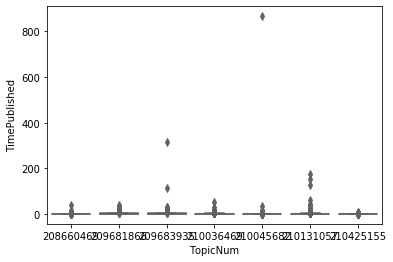

In [377]:
ax = sns.boxplot(x="TopicNum", y="TimePublished",   data=countDf, palette="Set3")

In [415]:
userIdDf = commentDf.drop_duplicates(['UserId','UserAltName'])[['UserId', 'UserAltName']]

In [416]:
countDf = commentDf.groupby(['UserId']).count().sort_values(['Comment'], ascending=False).reset_index()

In [417]:
countSummaryDf = pd.merge(countDf, userIdDf, on="UserId")[["UserId", "UserAltName_y", "Comment"]]
countSummaryDf = countSummaryDf.rename(columns={"UserId": "用户名", "UserAltName_y": "用户昵称", "Comment": "评论数"})

In [418]:
countSummaryDf.head(20)

,用户名,用户昵称,评论数
0,216513622,冬有雪,82
1,179737568,自知之明,37
2,2032472,不再有蓝,23
3,171427529,江湖骗子,14
4,217311709,🍓,14
5,194150430,西门吹吹雪,9
6,216306659,玛卡巴卡。,9
7,172127662,拳拳到rou,6
8,77455682,特蕾莎小姐,6
9,223257543,东海小龙女,6


In [419]:
commentDf.loc[commentDf['UserId'] == "216513622"]

,TopicNum,UserId,UserAltName,Comment,TimePublished
510,204807786,216513622,冬有雪,选cy最帅的是不是该看眼科了,2020-12-16 07:23:57
511,204807786,216513622,冬有雪,这家粉马上从rc席卷到草原了,2020-12-16 07:24:55
512,204807786,216513622,冬有雪,在rc组霸组了，需要扇他粉丝几耳光,2020-12-16 08:00:03
516,204807786,216513622,冬有雪,DD,2020-12-16 07:16:27
517,204807786,216513622,冬有雪,投票贴没人顶，,2020-12-16 07:19:40
518,204807786,216513622,冬有雪,🙄 好好给你顶起,2020-12-16 07:22:07
524,204807786,216513622,冬有雪,为何，这贴很公正,2020-12-16 07:32:01
526,204807786,216513622,冬有雪,豆瓣一霸？,2020-12-16 07:36:10
528,204807786,216513622,冬有雪,rc已经不能看了，🙄 也是没懂，以前挺好感人才的，最近选啥管理，不审核就进来一批水货。,2020-12-16 07:40:06
530,204807786,216513622,冬有雪,为什么rc变的这么赶客,2020-12-16 07:42:57


In [316]:
header={
    "Cookie": """bid=M8d5os6pdMc; __utmc=30149280; __utmz=30149280.1612629628.1.1.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not provided); push_noty_num=0; push_doumail_num=0; __utmv=30149280.23180; ap_v=0,6.0; _pk_ref.100001.8cb4=["","",1612647328,"https://www.google.com/"]; _pk_ses.100001.8cb4=*; __utma=30149280.40126775.1612629628.1612642552.1612647330.4; ct=y; __utmt=1; douban-profile-remind=1; dbcl2="231803702:5IsRvSA0Auk"; ck=chdf; _pk_id.100001.8cb4=a851698bf89c60d1.1612629627.4.1612649434.1612645058.; __utmb=30149280.165.5.1612649435302""",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36 Edg/88.0.705.63"
    }
url = "https://www.douban.com/group/topic/210660661/?start=0"

In [317]:
r = requests.get(url=url,headers=header)

In [318]:
data = r.content.decode('utf-8')

In [319]:
data

'<!DOCTYPE html>\n<html lang="zh-CN" class="ua-windows ua-webkit">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n    (盖楼抽奖)迪丽热巴粉丝送🐧年卡\n</title>\n    \n    \n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0">\n    \n    <meta http-equiv="Cache-Control" content="no-siteapp" />\n    \n\n    <meta name="mobile-agent" content="format=html5; url=https://m.douban.com/group/topic/210660661/">\n\n    <script >var _head_start = new Date();</script>\n    <script src="https://img9.doubanio.com/f/shire/72ced6df41d4d158420cebdd254f9562942464e3/js/jquery.min.js"></script>\n    <script src="https:/

In [191]:
soup = BeautifulSoup(data, 'html.parser')

In [192]:
#soup.find_all('li', class_='clearfix comment-item reply-item')[6]
soup

<!DOCTYPE html>

<html class="ua-windows ua-webkit" lang="zh-CN">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="webkit" name="renderer"/>
<meta content="always" name="referrer"/>
<meta content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" name="google-site-verification">
<title>
    李涛  成毅真的帅吗 非粉评（发了wb搜的粉丝精修图 ）
</title>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="Sun, 6 Mar 2005 01:00:00 GMT" http-equiv="Expires"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0" name="viewport"/>
<meta content="no-siteapp" http-equiv="Cache-Control">
<meta content="format=html5; url=https://m.douban.com/group/topic/210473494/" name="mobile-agent"/>
<script>var _head_start = new Date();</script>
<script src="https://img9.doubanio.com/f/shire/72ced6df41d4d158420cebdd254f9562942464e3/js/jquery.min.js"></script>
<script src="https://img9.doubanio.com/f/shire/5ecaf46d6954d5a30bc7d99be86ae34031646e00/js/douban.js"></scrip

In [152]:
soup.find_all('li', class_='clearfix comment-item reply-item')

[]

In [129]:
webInfo = soup.find_all('li', class_='clearfix comment-item reply-item')


In [131]:
replyIdList, replyIdListAltList, commentList, timeList = createInfoList(webInfo, replyIdList, replyIdListAltList, commentList, timeList)

In [173]:
commentList

['好了，IE今晚直播别忘了。谁还持续顶贴，我只能说，和你做同担，我很累',
 '每个人的审美不一样，ie觉得帅就行了',
 '今日求撕贴加一 成毅kpi🈶️ 后排别回了。',
 '在这里问没有意义 豆瓣就是粉粉黑黑 建议你去看两集琉璃 自然会有答案',
 '看个人审美，我觉得帅，非常，我鹅子(我不是ie)。',
 '每个人的审美不一样，ie觉得帅就行了',
 '看看大众审美',
 '看个人审美，我觉得帅，非常，我鹅子(我不是ie)。',
 '在这里问没有意义 豆瓣就是粉粉黑黑 建议你去看两集琉璃 自然会有答案',
 '帅吧，比绝大多数30岁普男帅',
 '今日求撕贴加一 成毅kpi🈶️ 后排别回了。',
 '而且真的高，身高没水分',
 '丑',
 '好了，IE今晚直播别忘了。谁还持续顶贴，我只能说，和你做同担，我很累',
 '也就一般帅吧，流口水的程度😍😍😍',
 '粉丝觉得吧',
 '要是帅怎么会豆瓣四丑之一呢',
 '都被评为豆瓣独丑了，你还在乎粉丝评价？哪家粉丝都一样认为自家帅的。就像我觉得爱豆圈有几个丑死了，粉丝还不是吹颜值。',
 '楼主是在查粉籍吗',
 '我初衷是看非粉评价 但是粉丝一涌而来  只能说明本组他粉丝含量好高🌚 ',
 '你帖子没写非粉评啊，楼主再开个贴写清楚非粉评',
 '贴几张图看看啊',
 '都这样了 已经不想再问了🙃\n萝卜白菜，各有所爱 他粉丝觉得帅就行了 路人的评价不重要',
 '刚刚看琉璃的时候不觉得帅，看完认可他的演技，滤镜产生了就是帅哥。',
 '豆瓣四丑不是随便说说的😢',
 '👌 ',
 '每个人审美都不一样',
 '路人快来啊',
 '当时不是有个万人鉴丑的帖子吗？他在榜。',
 '直播马上开始了，ie回家看直播去',
 '不丑的水平 没什么记忆点',
 '路人在哪里',
 '这是真的。这组就hr那几个占了。',
 '他的嘴怪怪的',
 '很丑 要相信大众审美',
 '我觉得他的鼻子特别好看',
 'NONONO 我没有这么无聊 真的就是一直迷惑而已 来求证一下 但是确实也看出来本组他粉丝含量多了',
 '他可是豆瓣那么多人投的丑人第二 你觉得你在这问能问到啥啊 ',
 '剧里好看',
 '不至于到丑，但确实不帅',
 '什么丑人第二？',
 '你这问题仿佛自己get不到一个豆瓣公认神颜而发出的疑问，问题成毅不是

In [186]:
len(commentDf)

141

In [187]:
commentDf.head(50)

,UserId,UserAltName,Comment,TimePublished
0,223073365,爱人,图一是在录歌，粉丝说的。图二是在工作，看右下角时间，晚上工作时刚拍的。成毅之前的电影都是原声...,2021-02-02 23:32:42
1,142280083,阿翾,看看时间节点吧，向粉丝分享今晚的工作而已,2021-02-02 23:33:29
2,226756360,千鸠饮,君屹的人还这么关心欢瑞的人啊 24小时sj吗,2021-02-02 23:33:30
3,179171162,忘,图一不是在录歌吗？,2021-02-02 23:30:21
4,230228860,鲜花赠与他,哈？不都是分享工作日常吗？,2021-02-02 23:32:43
5,225471918,大佬耗,2月2日 这个激动人心的日子 瑞思拜,2021-02-02 23:29:28
7,225471918,大佬耗,你拉黑我 就别进我的楼啊 给你留一条,2021-02-02 23:32:36
12,205896222,张麻子,你们嘲阿拉瑞瑞的演员老用配音，原音立马安排！,2021-02-02 23:34:09
13,224636687,吃瓜少年丶,图1歌手，图2演员，验证完毕,2021-02-02 23:34:46
14,154379951,Grit & Grin,配音咖这个词谁爱领谁领，别cue成毅了谢谢,2021-02-02 23:35:09


In [475]:
def readWebMemberData(page, groupNum):
    header={
    "Cookie": """bid=M8d5os6pdMc; __utmc=30149280; __utmz=30149280.1612629628.1.1.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not provided); push_doumail_num=0; __utmv=30149280.23180; ct=y; douban-profile-remind=1; push_noty_num=0; _pk_ref.100001.8cb4=["","",1612742209,"https://www.google.com/"]; _pk_ses.100001.8cb4=*; ap_v=0,6.0; __utma=30149280.40126775.1612629628.1612674106.1612742210.8; __utmt=1; ll="108120"; dbcl2="231803702:BHiciIvzZnI"; ck=q-BM; _pk_id.100001.8cb4=a851698bf89c60d1.1612629627.8.1612745545.1612675659.; __utmb=30149280.65.5.1612745546179""",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36 Edg/88.0.705.63"
    }
    url = "https://www.douban.com/group/"+ groupNum + "/members?start=" + str(page)
    r = requests.get(url=url,headers=header)
    data = r.content.decode('utf-8')
    return data

In [459]:
memberData = readWebMemberData(0, '702794')
soup = BeautifulSoup(memberData, 'html.parser')

In [460]:
memberInfo = soup.find_all('div', class_='name')

In [461]:
memberInfo[0].find("a", class_='').get_text()

'冲嫂阿霁'

In [462]:
memberInfo[0].find("a", class_='')['href']

'https://www.douban.com/people/160748468/'

In [463]:
def createMemInfoList(memberInfo, groupNum, memberIdAltList, memberIdUrlList):
    for member in memberInfo:
        memberIdAlt = member.find("a", class_='').get_text()
        memberIdUrl = member.find("a", class_='')['href']

        memberIdAltList.append(memberIdAlt)
        memberIdUrlList.append(memberIdUrl)

    return memberIdAltList, memberIdUrlList

In [533]:
memberIdAltList = []
memberIdUrlList = []
groupNum = '702794'
page = 0
memberCount = 1
while memberCount != 0:
    data = readWebMemberData(page, groupNum)
    soup = BeautifulSoup(data, 'html.parser')
    memberInfo = soup.find_all('div', class_='name')
    memberIdAltList, memberIdUrlList = createMemInfoList(memberInfo, groupNum, memberIdAltList, memberIdUrlList)
    memberCount = len(memberInfo)
    page+=35

In [534]:
groupMemberDf = pd.DataFrame(list(zip(memberIdAltList, memberIdUrlList)), 
               columns =['用户昵称','用户ID网址'])

In [535]:
len(groupMemberDf)

7397

In [536]:
groupMemberDf = groupMemberDf.drop_duplicates()

In [537]:
groupMemberDf.head()

,用户昵称,用户ID网址
0,金所炫,https://www.douban.com/people/fsv/
1,KEH,https://www.douban.com/people/189345243/
2,Anti_P,https://www.douban.com/people/229595332/
3,咯噔,https://www.douban.com/people/181997450/
4,Чэн И_意,https://www.douban.com/people/205511394/


In [538]:
len(groupMemberDf)

7386

In [492]:
len(memberIdAltList)

7382

In [458]:
memberIdAltList

[]

In [488]:
groupMemberDf['UserId'][0][30:-1]

'160748468'

In [489]:
memberId = []
for n in memberIdUrlList:
    memberId.append(n[30:-1])

In [491]:
len(memberId)

7382

In [547]:
def getIdFromUrl(row):
    return row['用户ID网址'][30:-1]

In [548]:
groupMemberDf['UserId'] = groupMemberDf.apply(getIdFromUrl, axis=1)

In [549]:
groupMemberDf.head()

,用户昵称,用户ID网址,UserId
0,金所炫,https://www.douban.com/people/fsv/,fsv
1,KEH,https://www.douban.com/people/189345243/,189345243
2,Anti_P,https://www.douban.com/people/229595332/,229595332
3,咯噔,https://www.douban.com/people/181997450/,181997450
4,Чэн И_意,https://www.douban.com/people/205511394/,205511394


In [498]:
#groupMemberDf.to_csv('data.csv', index=False)

In [562]:
commentDf.head()

,TopicNum,UserId,UserAltName,Comment,TimePublished
0,207857005,140563043,我说的都对,红一次不算什么，红两次才是牛掰,2021-01-11 00:18:58
1,207857005,165762764,江湖骗子,算，他的角色都很有魅力，大唐到锦衣算是翻红，现在粉丝也能打，他这个情况已经很牛逼了,2021-01-11 00:19:00
2,207857005,93291715,陈轻絮,我就记得去年播了三部剧，哪个月播剧哪个月就是v榜第一，作品就是底气,2021-01-11 00:20:01
3,207857005,140563043,我说的都对,我妈最近老是问他什么时候播剧，你们可以早点让国超播剧吗，她剧荒了,2021-01-11 00:21:16
4,207857005,209845416,朱夜宸,任嘉伦牛掰,2021-01-11 00:17:18


In [626]:
len(commentDf)

6021

In [552]:
combinedDf = pd.merge(groupMemberDf, commentDf, on="UserId", how='right')

In [556]:
combinedDf.head(50)

,用户昵称,用户ID网址,UserId,TopicNum,UserAltName,Comment,TimePublished
0,咯噔,https://www.douban.com/people/181997450/,181997450,206803129,咯噔,难得看到i九皇叔,2021-01-01 11:21:24
1,咯噔,https://www.douban.com/people/181997450/,181997450,206803129,咯噔,拍案惊起,2021-01-11 20:24:52
2,Чэн И_意,https://www.douban.com/people/205511394/,205511394,206803129,Чэн И_意,九皇叔 你真的无人在毅,2021-01-04 00:32:25
3,小花花七,https://www.douban.com/people/167151707/,167151707,206803129,小花花七,我特别喜欢这张,2021-01-01 23:08:49
4,小花花七,https://www.douban.com/people/167151707/,167151707,206803129,小花花七,许愿：天雷下降，严惩恶人,2021-01-01 23:11:42
5,小花花七,https://www.douban.com/people/167151707/,167151707,206803129,小花花七,少年郎,2021-01-01 23:12:28
6,小花花七,https://www.douban.com/people/167151707/,167151707,206803129,小花花七,九九绝了,2021-01-01 23:13:15
7,小花花七,https://www.douban.com/people/167151707/,167151707,206803129,小花花七,lz 考验你是不是i九的时候到了，下图是九吗 😄,2021-01-01 23:14:33
8,小花花七,https://www.douban.com/people/167151707/,167151707,206803129,小花花七,小九做错了啥，lz小九来给你拉普，你看看他,2021-01-01 23:17:44
9,小花花七,https://www.douban.com/people/167151707/,167151707,206803129,小花花七,💐九,2021-01-01 23:20:40


In [603]:
len(combinedDf)

865

In [555]:
combinedDf[['用户ID网址', 'UserId']].to_csv('data_5.csv', index=False)

In [607]:
combinedDf.to_csv('data_6.csv', index=False)

In [613]:
df1 = pd.read_excel("C:/Users/Shaozhu/Desktop/豆瓣数据/任嘉伦假路人粉.xlsx")

In [614]:
df1 = df1.astype({'UserId': 'str'})

In [615]:
df1.dtypes

UserId    object
dtype: object

In [617]:
len(df1)

465

In [627]:
combinedDf = pd.merge(combinedDf, commentDf, on="UserId", how='inner')

In [630]:
len(combinedDf)

484

In [629]:
combinedDf.head(50)

,UserId,TopicNum_x,UserAltName_x,Comment_x,TimePublished_x,TopicNum_y,UserAltName_y,Comment_y,TimePublished_y
0,56766841,207911018,秀秀姐,厉害了,2021-01-11 18:50:30,201742469,秀秀姐,撕逼还带家人，\n最脏的一家,2020-11-20 05:46:25
1,56766841,207911018,秀秀姐,厉害了,2021-01-11 18:50:30,201742469,秀秀姐,无耻简直,2020-11-20 07:29:33
2,56766841,207911018,秀秀姐,厉害了,2021-01-11 18:50:30,201742469,秀秀姐,先撩者贱望周知,2020-11-20 09:53:15
3,56766841,207911018,秀秀姐,厉害了,2021-01-11 18:50:30,201742469,秀秀姐,太过分了,2020-11-20 09:56:51
4,56766841,207911018,秀秀姐,厉害了,2021-01-11 18:50:30,201742469,秀秀姐,太无下线了,2020-11-20 10:00:24
5,56766841,207911018,秀秀姐,厉害了,2021-01-11 18:50:30,201742469,秀秀姐,粉明星之前先做个人吧,2020-11-20 10:01:40
6,56766841,207911018,秀秀姐,厉害了,2021-01-11 18:50:30,201742469,秀秀姐,过分！,2020-11-20 10:14:21
7,56766841,207911018,秀秀姐,厉害了,2021-01-11 18:50:30,201742469,秀秀姐,顶顶,2020-11-20 10:31:46
8,56766841,207911018,秀秀姐,厉害了,2021-01-11 18:50:30,201742469,秀秀姐,顶,2020-11-20 10:59:41
9,56766841,207911018,秀秀姐,厉害了,2021-01-11 18:50:30,201742469,秀秀姐,顶顶,2020-11-20 11:01:06


In [628]:
combinedDf['UserId'].nunique()

11